# Example on how to use the python class

## Get list of files and labels

List files, which are named with 'Traj' in folder 'data'

In [1]:
files = !ls -lh /work/bd1062/b309159/TUHH/STRATOFLY-MR3-2024/*.nc

In [2]:
[a.split()[-1] for a in files]

['/work/bd1062/b309159/TUHH/STRATOFLY-MR3-2024/Emission_Inventory_H2O_Optimized_v0.1_MR3_Fleet_BRU-MYA_2075.nc',
 '/work/bd1062/b309159/TUHH/STRATOFLY-MR3-2024/Emission_Inventory_NO_Optimized_v0.1_MR3_Fleet_BRU-MYA_2075.nc']

## Load class

In [3]:
from package import rf_of_trajectory as rf

## Calculate radiative forcing and emissions for each trajectory-file

In [5]:
trajectory = rf.RadiativeForcingOfTrajectory(files[0].split()[-1])

In [7]:
trajectory.drop_vertical_levels()

net_rf = trajectory.total_rf()

net_emis = trajectory.total_emis()

`rf_of_trajectory(file.split()[-1])` creates a class instance with the trajectory data file.
`load_trajectory_as_dataframe()` extracts the relevant data from the file within `__init__()`.
`drop_vertical_levels()` limits the vertical emission to emission above the tropopause, which is the default. Other vertical limits can be given in hectopascal with e.g. `drop_vertical_levels(100)` to limit emissions to above 100 hPa.
`total_rf()` returns the stratospheric adjusted radiative forcing of the trajectory.
`total_emis()` returns the accumulated emissions for the chosen vertical levels.

## Output

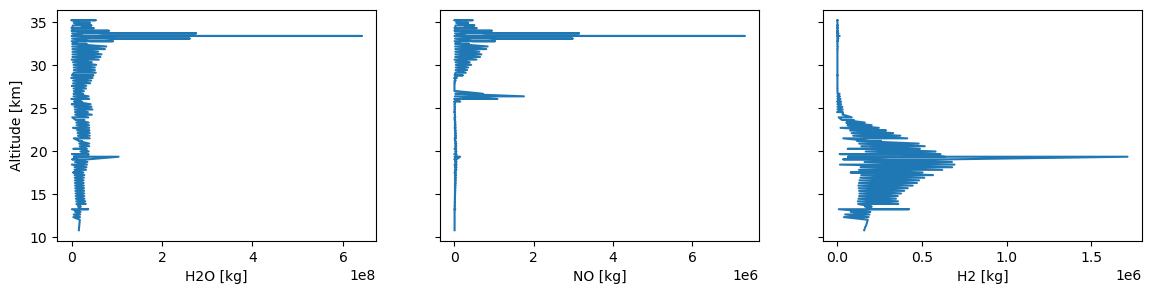

In [54]:
fig, axs = plt.subplots(1,3, figsize=(14,3), sharey=True)
trajectory.data.plot(x='H2O [kg]', y='Altitude [km]',ax=axs[0]), axs[0].set_ylabel('Altitude [km]')
trajectory.data.plot(x='NO [kg]', y='Altitude [km]',ax=axs[1])
trajectory.data.plot(x='H2 [kg]', y='Altitude [km]',ax=axs[2])

for ax in axs:
    ax.legend('', frameon=False)
    
plt.show()

<AxesSubplot:>

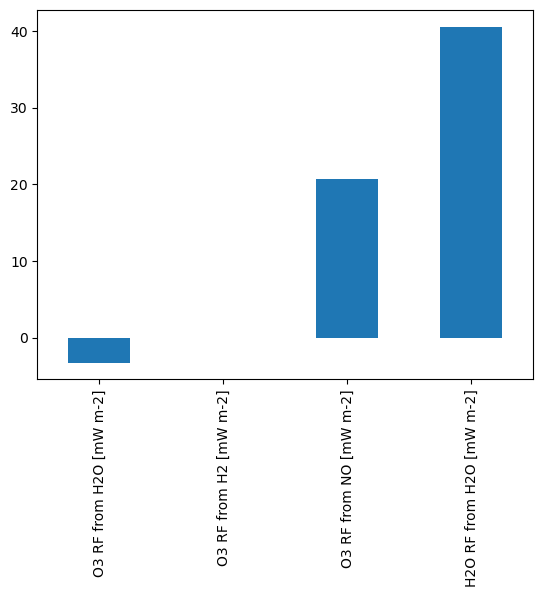

In [32]:
trajectory.data[['O3 RF from H2O [mW m-2]','O3 RF from H2 [mW m-2]','O3 RF from NO [mW m-2]','H2O RF from H2O [mW m-2]']].sum().plot.bar()

total_emis() returns three values with H$_2$O, H$_2$ and NO emission above the tropopause in tons in this order

In [9]:
net_emis # kg

[26958088.42, 24367.64, 278281.68]

total_rf() returns one value with radiative forcing from water vapour changes due to water vapour emisson and ozone radiative forcing from H$_2$O, H$_2$ and NO emission in mWm-2

In [10]:
net_rf # mWm-2

57.94266737036095